In [2]:
# Standard libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib.gridspec import GridSpec
pd.set_option('display.max_columns', 100)

In [3]:
# Reading all the files
raw_path = 'brazilian-ecommerce/'
customers = pd.read_csv(raw_path + 'olist_customers_dataset.csv')
geolocation = pd.read_csv(raw_path + 'olist_geolocation_dataset.csv')
orders = pd.read_csv(raw_path + 'olist_orders_dataset.csv')
order_items = pd.read_csv(raw_path + 'olist_order_items_dataset.csv')
order_payments = pd.read_csv(raw_path + 'olist_order_payments_dataset.csv')
order_reviews = pd.read_csv(raw_path + 'olist_order_reviews_dataset.csv')
products = pd.read_csv(raw_path + 'olist_products_dataset.csv')
sellers = pd.read_csv(raw_path + 'olist_sellers_dataset.csv')
product_category_name_translation = pd.read_csv(raw_path + 'product_category_name_translation.csv')

In [4]:
from IPython.display import display

def get_df_name(df):
    name =[x for x in globals() if globals()[x] is df][0]
    print(name)

list_df = [ customers,
            geolocation,
            orders,
            order_items,
            order_payments,
            order_reviews,
            products,
            sellers,
            product_category_name_translation]

for df in list_df:
    get_df_name(df)
    display(df)

customers


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS


geolocation


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP
...,...,...,...,...,...
1000158,99950,-28.068639,-52.010705,tapejara,RS
1000159,99900,-27.877125,-52.224882,getulio vargas,RS
1000160,99950,-28.071855,-52.014716,tapejara,RS
1000161,99980,-28.388932,-51.846871,david canabarro,RS


orders


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00


order_items


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72


order_payments


,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
...,...,...,...,...,...
103881,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31
103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80
103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77
103884,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54


order_reviews


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99995,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42
99996,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
99997,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13
99998,be360f18f5df1e0541061c87021e6d93,f8bd3f2000c28c5342fedeb5e50f2e75,1,NaN,Solicitei a compra de uma capa de retrovisor c...,2017-12-15 00:00:00,2017-12-16 01:29:43


products


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0


sellers


,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP
...,...,...,...,...
3090,98dddbc4601dd4443ca174359b237166,87111,sarandi,PR
3091,f8201cab383e484733266d1906e2fdfa,88137,palhoca,SC
3092,74871d19219c7d518d0090283e03c137,4650,sao paulo,SP
3093,e603cf3fec55f8697c9059638d6c8eb5,96080,pelotas,RS


product_category_name_translation


,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor
...,...,...
66,flores,flowers
67,artes_e_artesanato,arts_and_craftmanship
68,fraldas_higiene,diapers_and_hygiene
69,fashion_roupa_infanto_juvenil,fashion_childrens_clothes


## Create a function to explore each DF

In [19]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from scipy import stats 
import os
import matplotlib.pyplot as plt
import seaborn as sns 
def resumetable(df):
    print(f"Dataset Shape: {df.shape}")
    summary = pd.DataFrame(df.dtypes,columns=['dtypes'])
    summary = summary.reset_index()
    summary['Name'] = summary['index']
    summary = summary[['Name','dtypes']]
    summary['Missing'] = df.isnull().sum().values    
    summary['Uniques'] = df.nunique().values
    summary['First Value'] = df.loc[0].values
    summary['Second Value'] = df.loc[1].values
    
#     print(summary)
    return summary

In [20]:
from IPython.display import display

def get_df_name(df):
    name =[x for x in globals() if globals()[x] is df][0]
    print(name)

list_df = [customers,
orders,
order_items,
order_payments,
order_reviews,
products,
sellers,
product_category_name_translation]

for df in list_df:
    get_df_name(df)
    summary = resumetable(df)
    display(summary)
    print('\n\n')

customers
Dataset Shape: (99441, 5)


,Name,dtypes,Missing,Uniques,First Value,Second Value
0,customer_id,object,0,99441,06b8999e2fba1a1fbc88172c00ba8bc7,18955e83d337fd6b2def6b18a428ac77
1,customer_unique_id,object,0,96096,861eff4711a542e4b93843c6dd7febb0,290c77bc529b7ac935b93aa66c333dc3
2,customer_zip_code_prefix,int64,0,14994,14409,9790
3,customer_city,object,0,4119,franca,sao bernardo do campo
4,customer_state,object,0,27,SP,SP





orders
Dataset Shape: (99441, 8)


,Name,dtypes,Missing,Uniques,First Value,Second Value
0,order_id,object,0,99441,e481f51cbdc54678b7cc49136f2d6af7,53cdb2fc8bc7dce0b6741e2150273451
1,customer_id,object,0,99441,9ef432eb6251297304e76186b10a928d,b0830fb4747a6c6d20dea0b8c802d7ef
2,order_status,object,0,8,delivered,delivered
3,order_purchase_timestamp,object,0,98875,2017-10-02 10:56:33,2018-07-24 20:41:37
4,order_approved_at,object,160,90733,2017-10-02 11:07:15,2018-07-26 03:24:27
5,order_delivered_carrier_date,object,1783,81018,2017-10-04 19:55:00,2018-07-26 14:31:00
6,order_delivered_customer_date,object,2965,95664,2017-10-10 21:25:13,2018-08-07 15:27:45
7,order_estimated_delivery_date,object,0,459,2017-10-18 00:00:00,2018-08-13 00:00:00





order_items
Dataset Shape: (112650, 7)


,Name,dtypes,Missing,Uniques,First Value,Second Value
0,order_id,object,0,98666,00010242fe8c5a6d1ba2dd792cb16214,00018f77f2f0320c557190d7a144bdd3
1,order_item_id,int64,0,21,1,1
2,product_id,object,0,32951,4244733e06e7ecb4970a6e2683c13e61,e5f2d52b802189ee658865ca93d83a8f
3,seller_id,object,0,3095,48436dade18ac8b2bce089ec2a041202,dd7ddc04e1b6c2c614352b383efe2d36
4,shipping_limit_date,object,0,93318,2017-09-19 09:45:35,2017-05-03 11:05:13
5,price,float64,0,5968,58.9,239.9
6,freight_value,float64,0,6999,13.29,19.93





order_payments
Dataset Shape: (103886, 5)


,Name,dtypes,Missing,Uniques,First Value,Second Value
0,order_id,object,0,99440,b81ef226f3fe1789b1e8b2acac839d17,a9810da82917af2d9aefd1278f1dcfa0
1,payment_sequential,int64,0,29,1,1
2,payment_type,object,0,5,credit_card,credit_card
3,payment_installments,int64,0,24,8,1
4,payment_value,float64,0,29077,99.33,24.39





order_reviews
Dataset Shape: (100000, 7)


,Name,dtypes,Missing,Uniques,First Value,Second Value
0,review_id,object,0,99173,7bc2406110b926393aa56f80a40eba40,80e641a11e56f04c1ad469d5645fdfde
1,order_id,object,0,99441,73fc7af87114b39712e6da79b0a377eb,a548910a1c6147796b98fdf73dbeba33
2,review_score,int64,0,5,4,5
3,review_comment_title,object,88285,4600,NaN,NaN
4,review_comment_message,object,58247,36921,NaN,NaN
5,review_creation_date,object,0,637,2018-01-18 00:00:00,2018-03-10 00:00:00
6,review_answer_timestamp,object,0,99010,2018-01-18 21:46:59,2018-03-11 03:05:13





products
Dataset Shape: (32951, 9)


,Name,dtypes,Missing,Uniques,First Value,Second Value
0,product_id,object,0,32951,1e9e8ef04dbcff4541ed26657ea517e5,3aa071139cb16b67ca9e5dea641aaa2f
1,product_category_name,object,610,73,perfumaria,artes
2,product_name_lenght,float64,610,66,40,44
3,product_description_lenght,float64,610,2960,287,276
4,product_photos_qty,float64,610,19,1,1
5,product_weight_g,float64,2,2204,225,1000
6,product_length_cm,float64,2,99,16,30
7,product_height_cm,float64,2,102,10,18
8,product_width_cm,float64,2,95,14,20





sellers
Dataset Shape: (3095, 4)


,Name,dtypes,Missing,Uniques,First Value,Second Value
0,seller_id,object,0,3095,3442f8959a84dea7ee197c632cb2df15,d1b65fc7debc3361ea86b5f14c68d2e2
1,seller_zip_code_prefix,int64,0,2246,13023,13844
2,seller_city,object,0,611,campinas,mogi guacu
3,seller_state,object,0,23,SP,SP





product_category_name_translation
Dataset Shape: (71, 2)


,Name,dtypes,Missing,Uniques,First Value,Second Value
0,product_category_name,object,0,71,beleza_saude,informatica_acessorios
1,product_category_name_english,object,0,71,health_beauty,computers_accessories


## Good! no missing values on key to connect all tables

In [21]:
# merge all dfs with keys
df = orders.merge(order_items, on='order_id', how='outer').merge(order_payments, on='order_id', how='outer')\
           .merge(order_reviews, on='order_id', how='outer').merge(customers,on='customer_id',how='outer')\
           .merge(products, on='product_id', how='outer').merge(sellers,on='seller_id',how='outer')\
           .merge(product_category_name_translation, on='product_category_name', how='outer')
df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,1.0,credit_card,1.0,18.12,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350.0,maua,SP,housewares
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,3.0,voucher,1.0,2.00,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350.0,maua,SP,housewares
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,2.0,voucher,1.0,18.59,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350.0,maua,SP,housewares
3,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28 00:00:00,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-08-21 20:05:16,29.99,7.78,1.0,credit_card,3.0,37.77,b46f1e34512b0f4c74a72398b03ca788,4,NaN,Deveriam embalar melhor o produto. A caixa vei...,2017-08-19 00:00:00,2017-08-20 15:16:36,3a51803cc0d012c3b5dc8b7528cb05f7,3366,sao paulo,SP,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350.0,maua,SP,housewares
4,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15 00:00:00,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-08-08 18:37:31,29.99,7.78,1.0,credit_card,1.0,37.77,dc90f19c2806f1abba9e72ad3c350073,5,NaN,"Só achei ela pequena pra seis xícaras ,mais é ...",2017-08-08 00:00:00,2017-08-08 23:26:23,ef0996a1a279c26e7ecbd737be23d235,2290,sao paulo,SP,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350.0,maua,SP,housewares
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119146,30b0ea32347476f4b427daf62e09a5bb,9d9cfbce48737214f23bf294daf3c6f7,delivered,2017-08-12 19:20:39,2017-08-12 19:30:17,2017-08-14 18:26:28,2017-08-17 18:28:10,2017-09-05 00:00:00,1.0,b52e7c92200ed9874e77bc09b5ed4d40,c731d18cea9bf687ffee82a241c25b11,2017-08-17 19:

In [23]:
df.drop_duplicates() # no duplicates

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,1.0,credit_card,1.0,18.12,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350.0,maua,SP,housewares
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,3.0,voucher,1.0,2.00,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350.0,maua,SP,housewares
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,2.0,voucher,1.0,18.59,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350.0,maua,SP,housewares
3,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28 00:00:00,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-08-21 20:05:16,29.99,7.78,1.0,credit_card,3.0,37.77,b46f1e34512b0f4c74a72398b03ca788,4,NaN,Deveriam embalar melhor o produto. A caixa vei...,2017-08-19 00:00:00,2017-08-20 15:16:36,3a51803cc0d012c3b5dc8b7528cb05f7,3366,sao paulo,SP,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350.0,maua,SP,housewares
4,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15 00:00:00,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-08-08 18:37:31,29.99,7.78,1.0,credit_card,1.0,37.77,dc90f19c2806f1abba9e72ad3c350073,5,NaN,"Só achei ela pequena pra seis xícaras ,mais é ...",2017-08-08 00:00:00,2017-08-08 23:26:23,ef0996a1a279c26e7ecbd737be23d235,2290,sao paulo,SP,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350.0,maua,SP,housewares
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119146,30b0ea32347476f4b427daf62e09a5bb,9d9cfbce48737214f23bf294daf3c6f7,delivered,2017-08-12 19:20:39,2017-08-12 19:30:17,2017-08-14 18:26:28,2017-08-17 18:28:10,2017-09-05 00:00:00,1.0,b52e7c92200ed9874e77bc09b5ed4d40,c731d18cea9bf687ffee82a241c25b11,2017-08-17 19:

In [24]:
resumetable(df)

Dataset Shape: (119151, 40)


,Name,dtypes,Missing,Uniques,First Value,Second Value
0,order_id,object,0,99441,e481f51cbdc54678b7cc49136f2d6af7,e481f51cbdc54678b7cc49136f2d6af7
1,customer_id,object,0,99441,9ef432eb6251297304e76186b10a928d,9ef432eb6251297304e76186b10a928d
2,order_status,object,0,8,delivered,delivered
3,order_purchase_timestamp,object,0,98875,2017-10-02 10:56:33,2017-10-02 10:56:33
4,order_approved_at,object,177,90733,2017-10-02 11:07:15,2017-10-02 11:07:15
5,order_delivered_carrier_date,object,2086,81018,2017-10-04 19:55:00,2017-10-04 19:55:00
6,order_delivered_customer_date,object,3421,95664,2017-10-10 21:25:13,2017-10-10 21:25:13
7,order_estimated_delivery_date,object,0,459,2017-10-18 00:00:00,2017-10-18 00:00:00
8,order_item_id,float64,833,21,1,1
9,product_id,object,833,32951,87285b34884572647811a353c7ac498a,87285b34884572647811a353c7ac498a


In [62]:
# check for unique values of each column
for col in df:
    if col not in ['order_purchase_timestamp','order_estimated_delivery_date']:
        print(col, df[col].unique(), sep='\n',end='\n\n')

order_id
['e481f51cbdc54678b7cc49136f2d6af7' '128e10d95713541c87cd1a2e48201934'
 '0e7e841ddf8f8f2de2bad69267ecfbcf' ... '30b0ea32347476f4b427daf62e09a5bb'
 '1ce0acf125f1bcd636276dd213363196' 'c72888e51a36defb7b5d49201fcbccf7']

customer_id
['9ef432eb6251297304e76186b10a928d' 'a20e8105f23924cd00833fd87daa0831'
 '26c7ac168e1433912a51b924fbd34d34' ... '9d9cfbce48737214f23bf294daf3c6f7'
 'd11524bb77c28efad04e4467eac8a660' 'c3cd86c3cbac654f8558a8286ba93c1c']

order_status
['delivered' 'shipped' 'canceled' 'invoiced' 'processing' 'approved'
 'unavailable' 'created']

order_approved_at
['2017-10-02 11:07:15' '2017-08-15 20:05:16' '2017-08-02 18:43:15' ...
 '2017-08-12 19:30:17' '2017-07-31 18:25:20' '2017-07-11 10:55:14']

order_delivered_carrier_date
['2017-10-04 19:55:00' '2017-08-17 15:28:33' '2017-08-04 17:35:43' ...
 '2017-08-14 18:26:28' '2017-08-02 18:22:30' '2017-07-11 19:14:48']

order_delivered_customer_date
['2017-10-10 21:25:13' '2017-08-18 14:44:43' '2017-08-07 18:30:01' ...
 '20

In [63]:
list_col = ['customer_city']
for col in list_col:
    print(col)
    for i in df[col].unique():
        print(i, end=', ')

customer_city


sao paulo, florianopolis, manaus, sombrio, dracena, almenara, sao jose dos campos, brasilia, belo horizonte, sao bernardo do campo, sao luis, vila velha, sao caetano do sul, betim, botucatu, porto alegre, ribeirao preto, porto ferreira, rio grande, marechal candido rondon, rio de janeiro, gravatai, barretos, abaete, blumenau, sao jose do rio preto, piracicaba, itabira, santos, salmourao, sud mennucci, sorocaba, caxias do sul, limeira, campinas, serrana, unai, vacaria, joao monlevade, niteroi, ipatinga, contagem, tapejara, osasco, bauru, japeri, uberaba, tres barras, jaragua do sul, sao jose dos pinhais, francisco morato, planura, maua, patos de minas, santo andre, presidente prudente, marica, mogi das cruzes, ivoti, capivari, curitiba, guaruja, recife, governador valadares, porto velho, rio do sul, cajamar, vicosa, coronel fabriciano, carapicuiba, cabo frio, cacapava, guarulhos, cunha pora, jaraguari, salvador, volta redonda, pocos de caldas, santa maria, passo fundo, sao joao nepomuce

candiota, serra dos dourados, campestre, porto estrela, itabaianinha, sao fernando, bocaiuva do sul, santo antonio do descoberto, cambara, munhoz, mira estrela, fagundes, francisco dantas, dores de guanhaes, domiciano ribeiro, varjao de minas, camacan, ibiraci, itapirapua, sao pedro da agua branca, moreilandia, pedro ii, doverlandia, ibirapua, sao miguel, jundiai do sul, reriutaba, quarai, itapora, corumba de goias, nantes, cameta, riacho da cruz, capoeiras, nova brasilandia d'oeste, castilho, crominia, sao valentim, quilombo, pirapetinga, sao roque do canaa, toritama, coroaci, salto veloso, conrado, duere, capao do leao, sao bonifacio, pimenteiras, serra azul de minas, grajau, cacu, fervedouro, itatim, andrequice, pardinho, limoeiro, jaguaribara, lago verde, arraias, forquilha, vicencia, miranda do norte, brejo dos santos, carmo do rio verde, ibiapina, britania, vitorinos, macambara, coronel freitas, mata grande, morada nova, ocara, olho d'agua das flores, maranguape, coluna, belo jar

, materlandia, baguari, mansidao, vitorino, divinopolis de goias, tamandare, jacareacanga, adrianopolis, arvoredo, silvianopolis, populina, colorado do oeste, jaguari, pureza, itabi, joao dourado, ribeirao cascalheira, antonio goncalves, desterro do melo, rio grande do piaui, palmeira d oeste, teixeira, sete de setembro, uruoca, aparecida do rio negro, sao jose da tapera, miravania, nova mamore, igapora, nonoai, serrania, desembargador otoni, antonio cardoso, uirauna, sao mamede, anguera, propria, nova campina, lencois, passa tempo, paranapoema, barra do rio azul, tibau do sul, conquista d'oeste, manga, goiabeira, cipo, kalore, pontes gestal, tapinas, tacuru, taciba, claro dos pocoes, jardim olinda, pinhotiba, santa rita do itueto, calmon, oleo, cerro negro, pongai, agrolandia, angelica, cerrito, diogo de vasconcelos, santana do itarare, arembepe, silveira martins, chorrocho, padre paraiso, guabiju, pindoretama, pranchita, monte santo, varzedo, itaquirai, salobro, silveiras, campos ver

###### We can actually can clean seller_city (like remove the part after "/" or "-" or "@") but I'm not Brazilian so I can't understand those cities' name so we can do it if we have more time to research

In [26]:
df.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date',
       'price', 'freight_value', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value', 'review_id', 'review_score',
       'review_comment_title', 'review_comment_message',
       'review_creation_date', 'review_answer_timestamp', 'customer_unique_id',
       'customer_zip_code_prefix', 'customer_city', 'customer_state',
       'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'seller_zip_code_prefix', 'seller_city', 'seller_state',
       'product_category_name_english'],
      dtype='object')

In [29]:
# select some important feature:

subdf = df[['order_status', 'order_purchase_timestamp', 'order_estimated_delivery_date',
            'order_item_id', 'price', 'freight_value', 'payment_type',
            'payment_installments', 'payment_value', 'customer_city', 'customer_state',
            'seller_city', 'seller_state', 'product_category_name_english', 'review_score']]
subdf.to_csv('subdf_brazil.csv', index=False)
subdf

,order_status,order_purchase_timestamp,order_estimated_delivery_date,order_item_id,price,freight_value,payment_type,payment_installments,payment_value,customer_city,customer_state,seller_city,seller_state,product_category_name_english,review_score
0,delivered,2017-10-02 10:56:33,2017-10-18 00:00:00,1.0,29.99,8.72,credit_card,1.0,18.12,sao paulo,SP,maua,SP,housewares,4
1,delivered,2017-10-02 10:56:33,2017-10-18 00:00:00,1.0,29.99,8.72,voucher,1.0,2.00,sao paulo,SP,maua,SP,housewares,4
2,delivered,2017-10-02 10:56:33,2017-10-18 00:00:00,1.0,29.99,8.72,voucher,1.0,18.59,sao paulo,SP,maua,SP,housewares,4
3,delivered,2017-08-15 18:29:31,2017-08-28 00:00:00,1.0,29.99,7.78,credit_card,3.0,37.77,sao paulo,SP,maua,SP,housewares,4
4,delivered,2017-08-02 18:24:47,2017-08-15 00:00:00,1.0,29.99,7.78,credit_card,1.0,37.77,sao paulo,SP,maua,SP,housewares,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119146,delivered,2017-08-12 19:20:39,2017-09-05 00:00:00,1.0,174.00,39.06,credit_card,5.0,213.06,maua,SP,concordia,SC,la_cuisine,5
119147,delivered,2017-07-31 18:10:29,2017-08-28 00:00:00,1.0,129.00,26.18,credit_card,2.0,55.18,belo horizonte,MG,concordia,SC,la_cuisine,5
119148,delivered,2017-07-31 18:10:29,2017-08-28 00:00:00,1.0,129.00,26.18,voucher,1.0,100.00,belo horizonte,MG,concordia,SC,la_cuisine,5
119149,delivered,2017-07-11 10:45:57,2017-08-04 00:00:00,1.0,119.99,27.16,credit_card,1.0,47.15,porto alegre,RS,scao jose do rio pardo,SP,la_cuisine,5


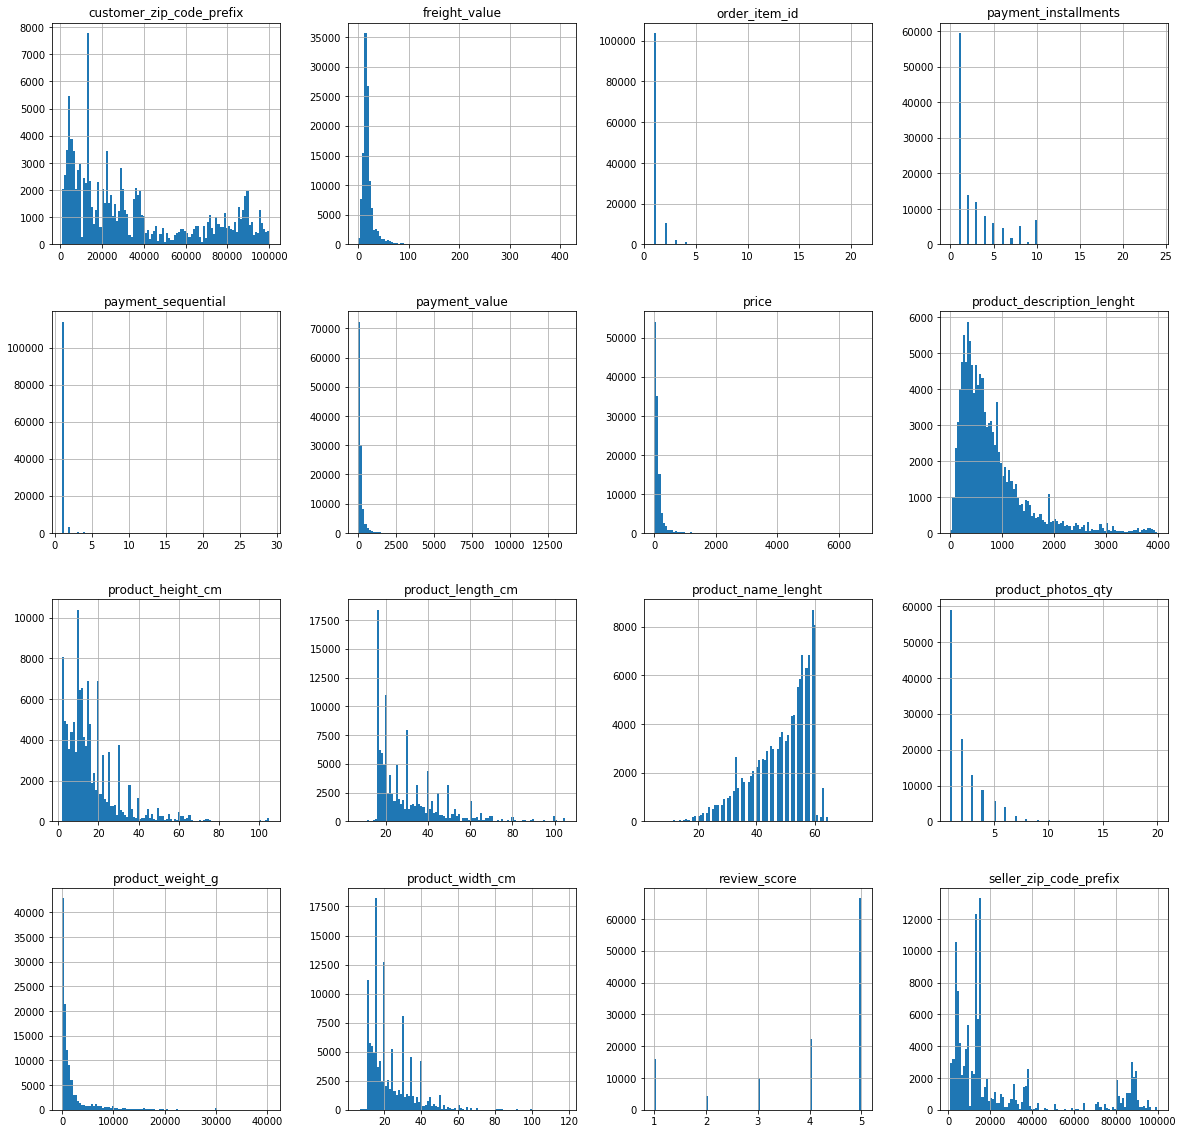

In [43]:
df.hist(bins=100, figsize=(20,20));

# EDA

In [28]:
# !pip install pandasql
from pandasql import sqldf

In [30]:
query = '''
        select order_status, count() c
        from subdf group by 1 order by c desc
        '''
output = sqldf(query)
output

,order_status,c
0,delivered,115731
1,shipped,1256
2,canceled,750
3,unavailable,652
4,invoiced,378
5,processing,376
6,created,5
7,approved,3


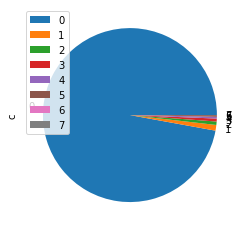

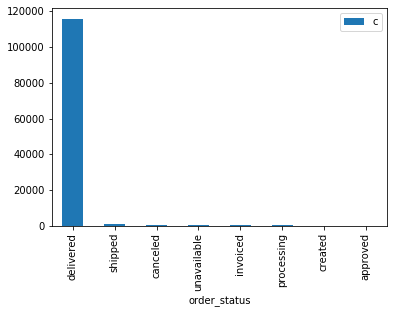

In [36]:
output.plot.pie(x='order_status', y='c');
output.plot.bar(x='order_status', y='c');

In [37]:
query = '''
        select customer_city,customer_state,seller_city,seller_state,product_category_name_english,
                sum(price) total_price
        from subdf 
        group by customer_city,customer_state,seller_city,seller_state,product_category_name_english
        -- cube(customer_city,customer_state,seller_city,seller_state,product_category_name_english)
        order by total_price desc
        '''
output = sqldf(query)
output

,customer_city,customer_state,seller_city,seller_state,product_category_name_english,total_price
0,sao paulo,SP,ibitinga,SP,bed_bath_table,90043.06
1,rio de janeiro,RJ,ibitinga,SP,bed_bath_table,42612.96
2,sao paulo,SP,sao paulo,SP,health_beauty,42003.97
3,sao paulo,SP,sao paulo,SP,furniture_decor,33763.18
4,sao paulo,SP,sao paulo,SP,cool_stuff,31221.44
...,...,...,...,...,...,...
56416,visconde do rio branco,MG,None,None,None,NaN
56417,vitoria,ES,None,None,None,NaN
56418,vitoria da conquista,BA,None,None,None,NaN
56419,volta redonda,RJ,None,None,None,NaN


,customer_state,total_price
0,SP,5.477589e+06
1,RJ,1.921753e+06
2,MG,1.645847e+06
3,RS,7.918018e+05
4,PR,7.087942e+05
5,BA,5.436638e+05
6,SC,5.398962e+05
7,DF,3.151223e+05
8,GO,3.131983e+05
9,ES,2.847713e+05


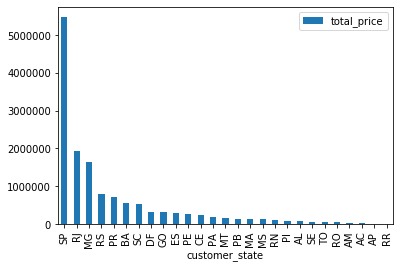

In [40]:
query = '''
        select 
        --customer_city
        customer_state
        --,seller_city,seller_state
                ,sum(price) total_price
        from subdf 
        group by 1
        --grouping sets ((customer_city,customer_state),(seller_city,seller_state))
        --rollup(customer_city,customer_state,seller_city,seller_state)
        -- cube(customer_city,customer_state,seller_city,seller_state,product_category_name_english)
        having total_price > 0
        order by total_price desc
        '''
output = sqldf(query)
output.plot.bar(x='customer_state', y='total_price');
output

## Total price each state by month - Time Machine chart
https://datastories.ataccama.com/publish/public/dashboard/33c2f697-3346-4a93-b8e3-5bd98b80d6f0?fbclid=IwAR3rokw7evCKzTjgllMmA5oOMijXJTgdFVoKJtTcpilR8PrNoPWymMVkTms

 - Sao Paolo is vibrant state for purchasing

,customer_state,avg_price
0,PB,193.462875
1,AL,180.334026
2,AC,179.573053
3,TO,165.934838
4,RN,165.688021
5,PA,164.517731
6,RO,164.209895
7,AP,162.551190
8,PI,160.675436
9,CE,154.302783


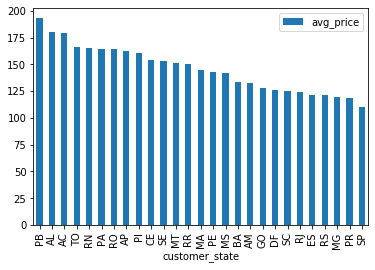

In [41]:
query = '''
        select 
        customer_state,
        AVG(price) avg_price
        from subdf 
        group by 1
        --grouping sets ((customer_city,customer_state),(seller_city,seller_state))
        --rollup(customer_city,customer_state,seller_city,seller_state)
        -- cube(customer_city,customer_state,seller_city,seller_state,product_category_name_english)
        order by 2 desc
        '''
output = sqldf(query)
output.plot.bar(x='customer_state', y='avg_price');
output

,customer_state,number_customers
0,SP,50268
1,RJ,15518
2,MG,13819
3,RS,6574
4,PR,6043
5,SC,4345
6,BA,4092
7,DF,2516
8,GO,2466
9,ES,2360


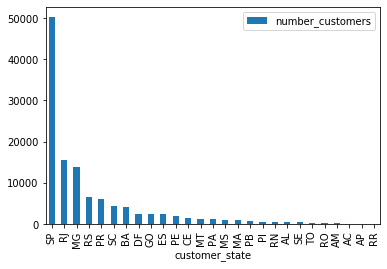

In [42]:
query = '''
        select 
        customer_state,
        count() number_customers
        from subdf 
        group by 1
        --grouping sets ((customer_city,customer_state),(seller_city,seller_state))
        --rollup(customer_city,customer_state,seller_city,seller_state)
        -- cube(customer_city,customer_state,seller_city,seller_state,product_category_name_english)
        order by 2 desc
        '''
output = sqldf(query)
output.plot.bar(x='customer_state', y='number_customers');
output

,payment_type,total_payment
0,credit_card,1.577690e+07
1,boleto,4.110921e+06
2,voucher,4.359178e+05
3,debit_card,2.573749e+05
4,not_defined,0.000000e+00
5,None,NaN


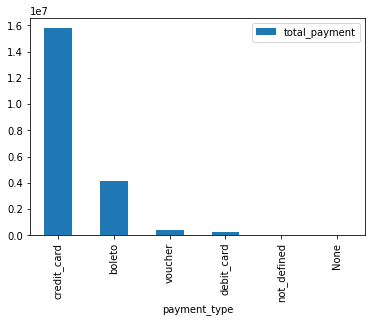

In [44]:
query = '''
        select payment_type, sum(payment_value) total_payment
        from df
        group by 1
        order by 2 desc
        '''
output = sqldf(query)
output.plot.bar(x='payment_type', y='total_payment');
output

,product_category_name_english,total_price,number
0,health_beauty,1302046.97,10033
1,watches_gifts,1254322.95,6213
2,bed_bath_table,1107397.98,11990
3,sports_leisure,1029631.88,9005
4,computers_accessories,950134.59,8151
...,...,...,...
67,flowers,1110.04,33
68,home_comfort_2,773.17,31
69,cds_dvds_musicals,730.00,14
70,fashion_childrens_clothes,569.85,8


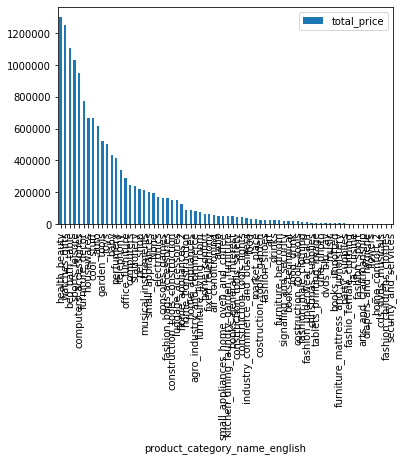

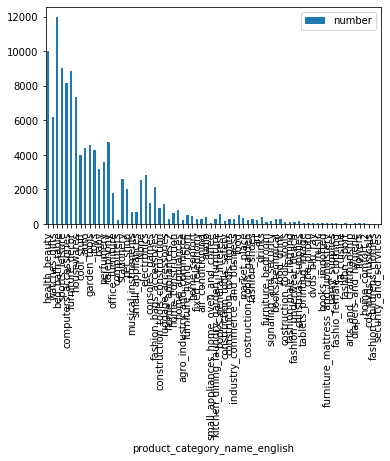

In [54]:
query = '''
        select product_category_name_english,
                sum(price) total_price,
                count() number
        from subdf 
        group by 1
        -- cube(customer_city,customer_state,seller_city,seller_state,product_category_name_english)
        order by total_price desc
        '''
output = sqldf(query)
# plt.figure(figsize=(18,5))
output.plot.bar(x='product_category_name_english', y='total_price');
output.plot.bar(x='product_category_name_english', y='number');
# plt.show();
output

In [56]:
query = '''
        select 
            --date(order_purchase_timestamp) d,
            strftime('%Y', order_purchase_timestamp) AS year,
            strftime('%m', order_purchase_timestamp) AS month,
            customer_state,
            sum(price) total_price
            --EXTRACT(YEAR FROM (date(order_purchase_timestamp))) AS year
        from subdf 
        group by 1,2,3 
        order by 3, 1, 2
        '''
output = sqldf(query)
output

,year,month,customer_state,total_price
0,2017,01,AC,589.60
1,2017,02,AC,450.40
2,2017,03,AC,455.99
3,2017,04,AC,1162.38
4,2017,05,AC,3055.99
...,...,...,...,...
560,2018,04,TO,4291.82
561,2018,05,TO,2739.99
562,2018,06,TO,9938.19
563,2018,07,TO,2613.67


# Growth by month each state

In [57]:
query = """
        with price as
        (SELECT *,
            LAG (total_price, 1) OVER (PARTITION BY customer_state ORDER BY year, month)
            AS last_month_price
            FROM
            (select 
                    strftime('%Y', order_purchase_timestamp) AS year,
                    strftime('%m', order_purchase_timestamp) AS month,
                    customer_state,
                    sum(price) total_price
                from subdf 
                group by 1,2,3 
                order by 3, 1, 2))
        select *, round((total_price/last_month_price -1)*100, 2) as growth
        from price
                    """
output = sqldf(query)
output

,year,month,customer_state,total_price,last_month_price,growth
0,2017,01,AC,589.60,NaN,NaN
1,2017,02,AC,450.40,589.60,-23.61
2,2017,03,AC,455.99,450.40,1.24
3,2017,04,AC,1162.38,455.99,154.91
4,2017,05,AC,3055.99,1162.38,162.91
...,...,...,...,...,...,...
560,2018,04,TO,4291.82,4573.81,-6.17
561,2018,05,TO,2739.99,4291.82,-36.16
562,2018,06,TO,9938.19,2739.99,262.71
563,2018,07,TO,2613.67,9938.19,-73.70


In [59]:
output.to_csv('growth_state_by_month.csv', index=False)

AC
0        NaN
1     -23.61
2       1.24
3     154.91
4     162.91
5     -87.38
6      60.37
7       3.11
8     180.11
9     -55.16
10    -18.88
11     69.37
12    -15.35
13    -78.34
14    -51.54
15    332.49
16    222.68
17    -68.65
18    243.53
19    -69.61
Name: growth, dtype: float64
<class 'pandas.core.series.Series'>


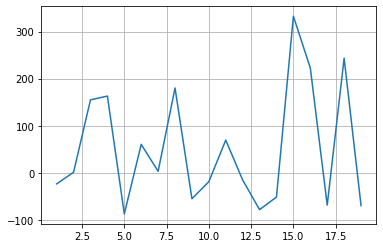

AL
20       NaN
21    377.60
22    655.39
23    -60.52
24    346.80
25     -4.26
26    -81.06
27    145.48
28    318.27
29    -52.59
30     17.71
31     15.66
32    -64.74
33    138.23
34    -13.31
35     52.32
36    -12.03
37    -40.58
38      2.01
39      8.73
40    -44.45
Name: growth, dtype: float64
<class 'pandas.core.series.Series'>


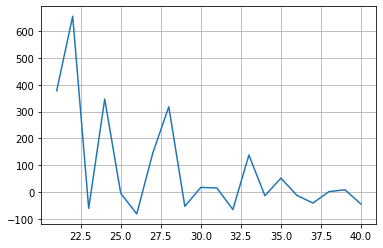

AM
41        NaN
42     -30.07
43      49.87
44      13.37
45     -84.15
46     347.97
47      67.64
48      -8.88
49     -93.91
50    3617.90
51     -57.75
52     172.55
53     -33.15
54     -44.88
55     -40.28
56     171.31
57     -40.70
58      86.61
59     -81.01
Name: growth, dtype: float64
<class 'pandas.core.series.Series'>


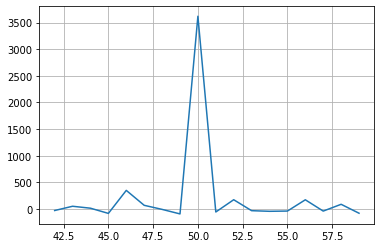

AP
60       NaN
61    -44.75
62    334.64
63    -80.86
64      2.85
65     11.50
66     25.82
67    336.60
68    -67.84
69     38.10
70    238.62
71    -57.89
72    -39.44
73     34.78
74     16.16
75    -82.48
76    706.57
77    -85.64
Name: growth, dtype: float64
<class 'pandas.core.series.Series'>


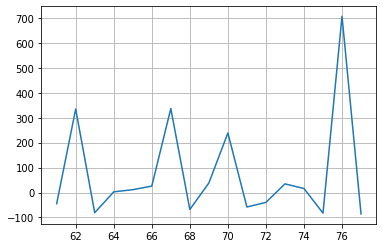

BA
78       NaN
79    358.03
80    122.92
81     78.90
82     17.24
83     -8.59
84     36.32
85    -15.48
86     65.18
87    -21.49
88     -1.45
89     19.95
90     -6.25
91     30.40
92     -8.71
93     16.77
94    -19.58
95     17.31
96     -1.01
97     16.93
98    -48.08
Name: growth, dtype: float64
<class 'pandas.core.series.Series'>


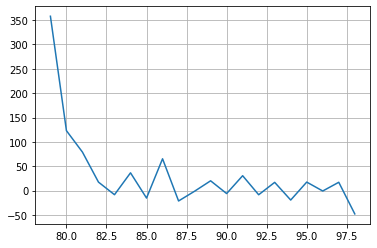

CE
99        NaN
100    -37.88
101    110.28
102    170.52
103      3.56
104     80.81
105     -9.03
106    -21.34
107     42.56
108     49.92
109    -23.57
110     58.72
111    -44.69
112     27.54
113    -23.86
114     68.16
115     -6.08
116    -29.12
117     53.41
118    -13.64
119    -41.59
Name: growth, dtype: float64
<class 'pandas.core.series.Series'>


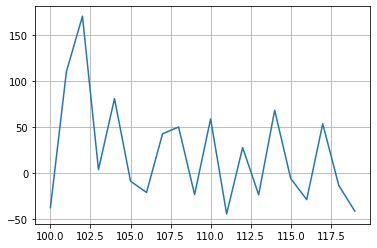

DF
120       NaN
121     75.00
122    464.25
123    -24.57
124     48.26
125    -24.78
126     -3.98
127     30.88
128     -6.88
129     40.88
130     -7.31
131    118.20
132    -37.02
133     -1.32
134     19.23
135     -0.96
136     -9.44
137     36.60
138    -21.77
139     12.92
140    -13.16
Name: growth, dtype: float64
<class 'pandas.core.series.Series'>


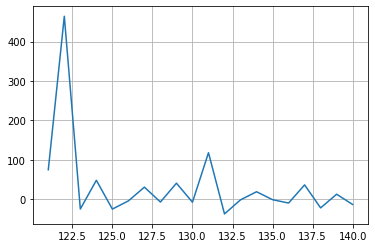

ES
141       NaN
142    145.80
143    111.53
144      4.47
145     16.40
146    147.19
147    -26.51
148    -29.16
149     83.90
150    -17.23
151      2.28
152    112.79
153    -46.97
154     57.95
155    -17.15
156      6.63
157     -8.34
158     16.88
159     -1.86
160     58.95
161    -45.56
Name: growth, dtype: float64
<class 'pandas.core.series.Series'>


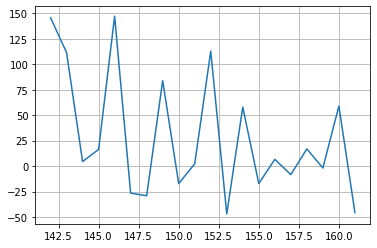

GO
162       NaN
163    303.50
164    -45.70
165    277.74
166    -37.61
167    224.06
168    -41.98
169    -10.83
170     73.14
171     15.40
172     -0.99
173     19.70
174    -25.70
175      7.14
176      6.20
177      9.18
178     16.67
179      7.18
180    -41.00
181     72.13
182    -28.98
Name: growth, dtype: float64
<class 'pandas.core.series.Series'>


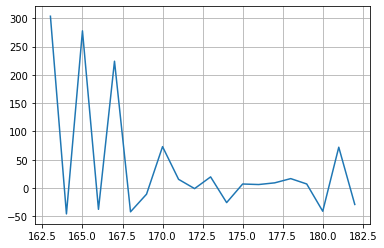

MA
183       NaN
184    -12.24
185     44.85
186    120.69
187     80.09
188     -3.32
189    -48.28
190    267.47
191     -4.90
192     53.10
193      8.58
194      0.40
195    -40.78
196     45.68
197     20.16
198    -16.32
199    -10.70
200    -11.88
201    -13.36
202     10.07
203    -37.14
Name: growth, dtype: float64
<class 'pandas.core.series.Series'>


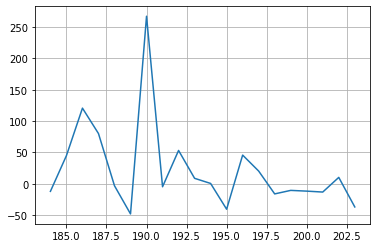

MG
204       NaN
205    232.15
206     93.57
207     34.25
208     -2.68
209     21.99
210     -6.75
211     19.25
212      7.68
213     20.17
214     18.42
215     59.93
216    -31.28
217     21.83
218     -4.53
219      9.65
220     -8.59
221     -5.64
222      2.55
223     -7.04
224     -3.55
225       NaN
Name: growth, dtype: float64
<class 'pandas.core.series.Series'>


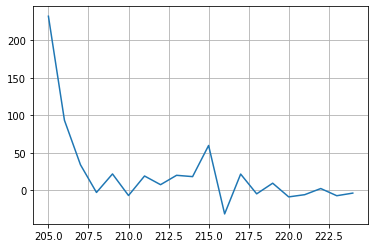

MS
226        NaN
227    4946.84
228      -8.93
229     -72.20
230      82.62
231      22.15
232      -5.89
233      -2.47
234      25.76
235      27.84
236      16.69
237     -24.83
238     101.88
239     -21.12
240     -15.26
241     -14.74
242      57.80
243     -10.96
244     -17.69
245     -24.11
Name: growth, dtype: float64
<class 'pandas.core.series.Series'>


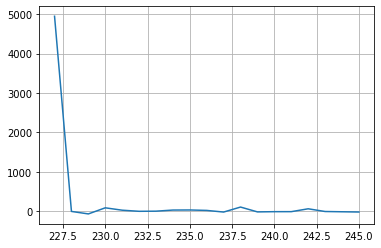

MT
246       NaN
247    503.02
248     51.19
249    -27.82
250    582.90
251    -52.92
252    -37.62
253    143.46
254    -19.40
255    -18.25
256     55.86
257      5.81
258    -15.90
259     29.33
260    -33.64
261      6.61
262     33.46
263      6.61
264    -16.09
265      1.88
266    -55.40
Name: growth, dtype: float64
<class 'pandas.core.series.Series'>


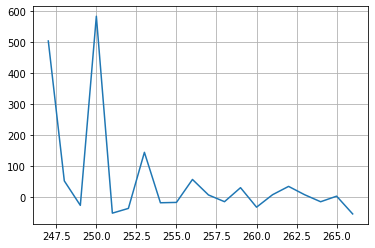

PA
267       NaN
268    106.53
269    340.82
270    -22.16
271    -34.37
272     29.94
273    -12.34
274     -0.77
275    166.93
276    -57.90
277      7.25
278     72.46
279     -6.44
280     27.97
281    -34.16
282     41.51
283    -10.19
284    -35.67
285     26.51
286     46.89
287    -37.28
Name: growth, dtype: float64
<class 'pandas.core.series.Series'>


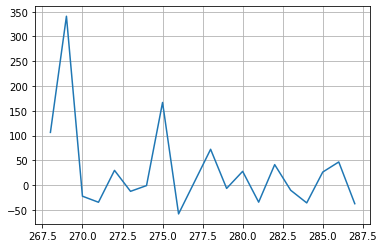

PB
288       NaN
289    721.24
290    872.21
291     12.39
292    -31.75
293     -4.49
294    117.97
295    -27.16
296    -49.84
297    141.70
298    106.87
299    -60.71
300     25.36
301     28.81
302    -32.13
303     25.46
304    -19.54
305     -2.78
306    197.49
307      8.17
308    -42.99
Name: growth, dtype: float64
<class 'pandas.core.series.Series'>


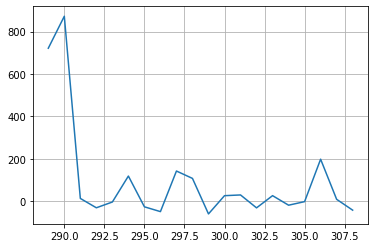

PE
309       NaN
310     37.64
311     48.44
312    157.80
313    -40.56
314    158.28
315    -42.95
316     63.03
317     29.27
318     18.59
319     27.80
320      0.15
321    -18.98
322     -7.90
323     16.75
324     31.90
325    -20.32
326    -22.19
327      6.82
328     61.86
329    -50.57
Name: growth, dtype: float64
<class 'pandas.core.series.Series'>


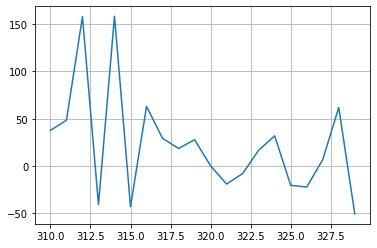

PI
330       NaN
331    495.64
332    211.29
333    -45.90
334     26.37
335    127.19
336    -64.49
337      2.54
338    115.91
339    -27.79
340     47.21
341    -43.46
342     -6.50
343    152.97
344    -33.58
345     58.58
346     63.28
347    -35.35
348    -34.06
349     47.87
350    -57.11
351       NaN
Name: growth, dtype: float64
<class 'pandas.core.series.Series'>


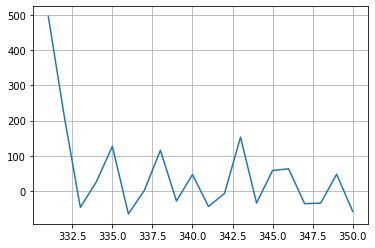

PR
352         NaN
353      -99.49
354    50235.14
355      246.33
356       -9.34
357       -4.48
358       98.80
359      -33.76
360       20.52
361       13.95
362      -20.84
363       47.28
364       39.82
365      -37.21
366       57.48
367       -2.35
368       16.31
369       26.46
370      -30.35
371       -9.99
372       11.35
373       -9.36
Name: growth, dtype: float64
<class 'pandas.core.series.Series'>


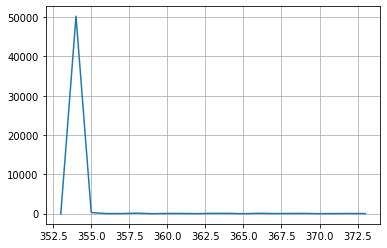

RJ
374       NaN
375     29.04
376    124.10
377     82.59
378     -3.01
379     33.58
380    -29.38
381     52.06
382     -3.78
383     22.50
384     -0.07
385     52.42
386    -22.23
387      6.50
388     -3.10
389      1.02
390      3.20
391      0.01
392    -16.69
393     -2.64
394     -6.32
395       NaN
396       NaN
Name: growth, dtype: float64
<class 'pandas.core.series.Series'>


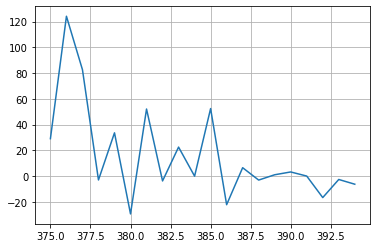

RN
397       NaN
398    403.49
399    -86.13
400    379.76
401    -40.05
402    259.59
403    -72.46
404    122.44
405    -21.05
406     35.38
407     24.71
408    100.01
409    -59.18
410     72.90
411    -46.95
412    315.56
413    -55.12
414    -29.47
415     57.27
416     30.40
417    -39.68
Name: growth, dtype: float64
<class 'pandas.core.series.Series'>


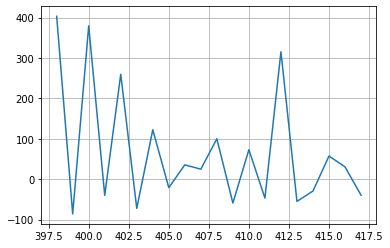

RO
418       NaN
419    137.79
420     14.96
421    -42.22
422    -48.82
423    308.16
424    -51.85
425    107.98
426     86.26
427    -60.51
428    252.98
429    -64.82
430     11.08
431    -30.93
432     75.76
433     26.08
434    -35.56
435    -14.80
436    142.71
437    -39.36
Name: growth, dtype: float64
<class 'pandas.core.series.Series'>


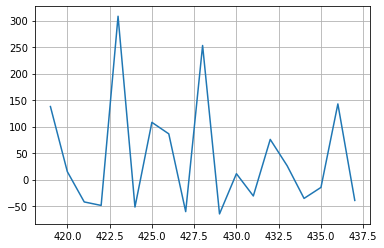

RR
438        NaN
439     -45.53
440      27.96
441     433.44
442     -81.94
443     376.22
444     -59.93
445      92.61
446     -77.77
447     872.69
448     -74.64
449     122.01
450      -9.05
451    1027.02
452     -68.25
453     -87.39
454    1381.64
455      13.72
Name: growth, dtype: float64
<class 'pandas.core.series.Series'>


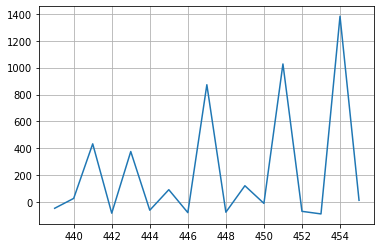

RS
456        NaN
457    6819.53
458     210.95
459      24.61
460      27.07
461      -3.46
462      54.80
463     -18.76
464      40.61
465       2.70
466       6.47
467       5.52
468      52.21
469     -24.34
470       9.51
471      -1.80
472      23.63
473     -12.94
474      13.43
475     -24.58
476      -0.65
477      -2.47
Name: growth, dtype: float64
<class 'pandas.core.series.Series'>


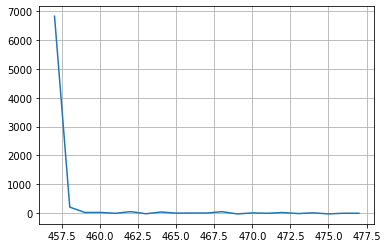

SC
478       NaN
479    195.88
480     12.91
481    131.32
482    -28.82
483     84.79
484    -37.57
485     34.85
486     11.43
487     22.33
488    -23.20
489     93.68
490    -39.29
491     61.02
492    -16.00
493     11.93
494     19.20
495    -19.25
496     -6.00
497     -8.28
498     10.91
499       NaN
Name: growth, dtype: float64
<class 'pandas.core.series.Series'>


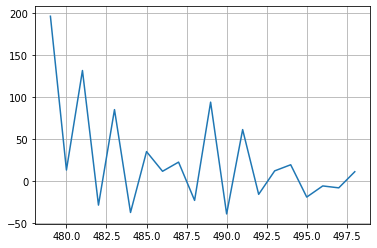

SE
500       NaN
501     -7.58
502    620.92
503     37.57
504     -0.81
505    -70.79
506     92.13
507     -2.43
508    239.30
509    -41.61
510     52.53
511     29.92
512    -43.58
513     -2.78
514     84.36
515    -47.93
516      9.28
517    -66.26
518    258.58
519     19.01
520     -1.39
Name: growth, dtype: float64
<class 'pandas.core.series.Series'>


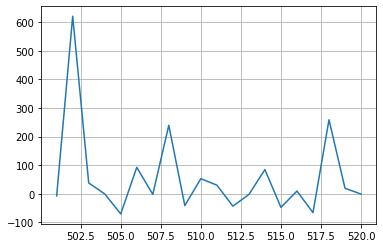

SP
521         NaN
522    11405.91
523      185.32
524       85.32
525       82.21
526       -5.36
527       41.50
528       -7.59
529        9.17
530        4.04
531       13.06
532       -0.42
533       60.41
534      -22.59
535       35.37
536      -16.18
537       19.31
538        3.78
539        8.34
540      -19.84
541       -5.87
542       22.04
543      -99.96
544         NaN
Name: growth, dtype: float64
<class 'pandas.core.series.Series'>


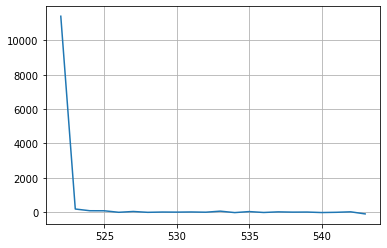

TO
545        NaN
546      21.55
547      -4.96
548     338.78
549     -33.47
550      88.06
551     -97.56
552    2087.25
553      75.08
554     -19.86
555     -21.93
556     -35.29
557      75.11
558      22.34
559      41.24
560      -6.17
561     -36.16
562     262.71
563     -73.70
564     -24.63
Name: growth, dtype: float64
<class 'pandas.core.series.Series'>


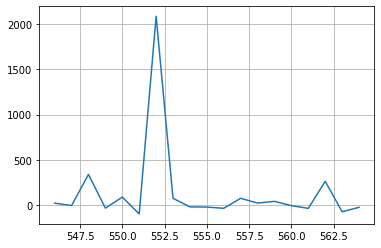

In [60]:
for state in output.customer_state.unique():
    print(state)
    st = output[output.customer_state==state]
    st = st[st.year!=2016]
    print(st.growth)
    print(type(st.growth))
    st.growth.plot(grid=True);
    plt.show();
#     print(st)

## Some more visualization on Tableau:
https://public.tableau.com/app/profile/cuong.tran.manh/viz/Brazilian_ecommerce_16579141132030/productcate?publish=yes

## Which additional data/dataset do you think the company should collect and why
- I think we should widen the time range to at least 3 years because it will be easier for us to figure out the trend 
in a year. So, from it, we can predict the month (quarter) or special occasion (eg: Black Friday, Boxing day,...) that our customers want to buy products. It will be good for preparation for a marketing campaign or planning for sellers.